In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools as it
from MetricMethod import *
from phik import phik_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [3]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
df['credit_score'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: credit_score, dtype: float64

In [5]:
mean = df['credit_score'].mean()
std = df['credit_score'].std()

lower_limit = mean - 3 * std
upper_limit = mean + 3 * std

print(lower_limit, upper_limit)

360.568903791609 940.488696208391


In [6]:
df[(df['credit_score'] < lower_limit) | (df['credit_score'] > upper_limit)]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1405,15612494,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,15685372,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,15758813,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,15692416,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,15679249,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
8723,15803202,350,France,Male,51,10,0.00,1,1,1,125823.79,1
8762,15765173,350,France,Female,60,3,0.00,1,0,0,113796.15,1
9624,15668309,350,France,Female,40,0,111098.85,1,1,1,172321.21,1


In [7]:
for coulumn in it.filterfalse(lambda x: x in 
                            set(['customer_id', 'country', 'gender', 'churn', 'products_number']),
                            it.islice(df.columns, 0, None)):
    mean = df[coulumn].mean()
    std = df[coulumn].std()

    lower_limit = mean - 3 * std
    upper_limit = mean + 3 * std

    ind = (df[coulumn] < lower_limit) | (df[coulumn] > upper_limit)
    out = df[ind][['customer_id', coulumn]]
    if len(out) > 0:
        print(lower_limit, upper_limit)
        print(out)


360.568903791609 940.488696208391
      customer_id  credit_score
1405     15612494           359
1631     15685372           350
1838     15758813           350
1962     15692416           358
2473     15679249           351
8723     15803202           350
8762     15765173           350
9624     15668309           350
7.458380644886169 70.38521935511383
      customer_id  age
85       15805254   75
158      15589975   73
230      15808473   72
252      15793726   79
310      15712287   80
...           ...  ...
9646     15603111   71
9671     15636061   78
9736     15644103   78
9894     15704795   77
9936     15653037   77

[133 rows x 2 columns]


In [8]:
df.groupby('gender')['churn'].agg(['mean', 'count'])

,mean,count
gender,,
Female,0.250715,4543
Male,0.164559,5457


<AxesSubplot: xlabel='gender'>

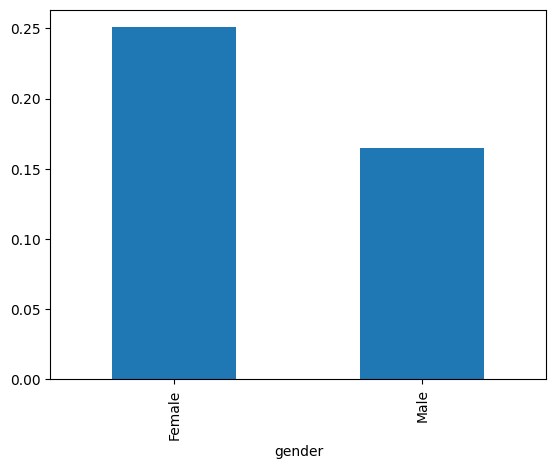

In [9]:
df.groupby('gender')['churn'].mean().plot.bar()


<AxesSubplot: xlabel='gender', ylabel='count churn'>

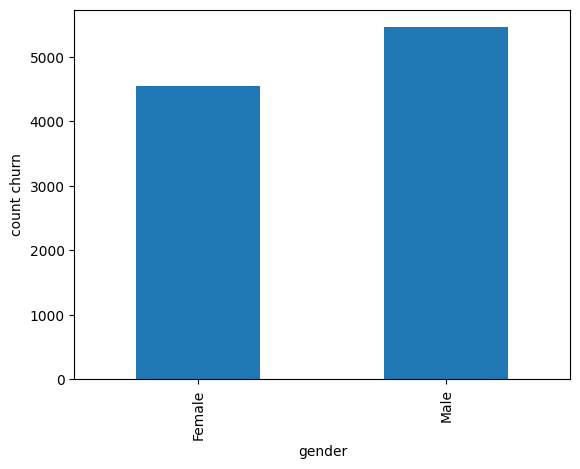

In [10]:
df.groupby('gender')['churn'].count().plot.bar(ylabel='count churn')

array([[<AxesSubplot: title={'center': 'customer_id'}>,
        <AxesSubplot: title={'center': 'credit_score'}>,
        <AxesSubplot: title={'center': 'age'}>],
       [<AxesSubplot: title={'center': 'tenure'}>,
        <AxesSubplot: title={'center': 'balance'}>,
        <AxesSubplot: title={'center': 'products_number'}>],
       [<AxesSubplot: title={'center': 'credit_card'}>,
        <AxesSubplot: title={'center': 'active_member'}>,
        <AxesSubplot: title={'center': 'estimated_salary'}>],
       [<AxesSubplot: title={'center': 'churn'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

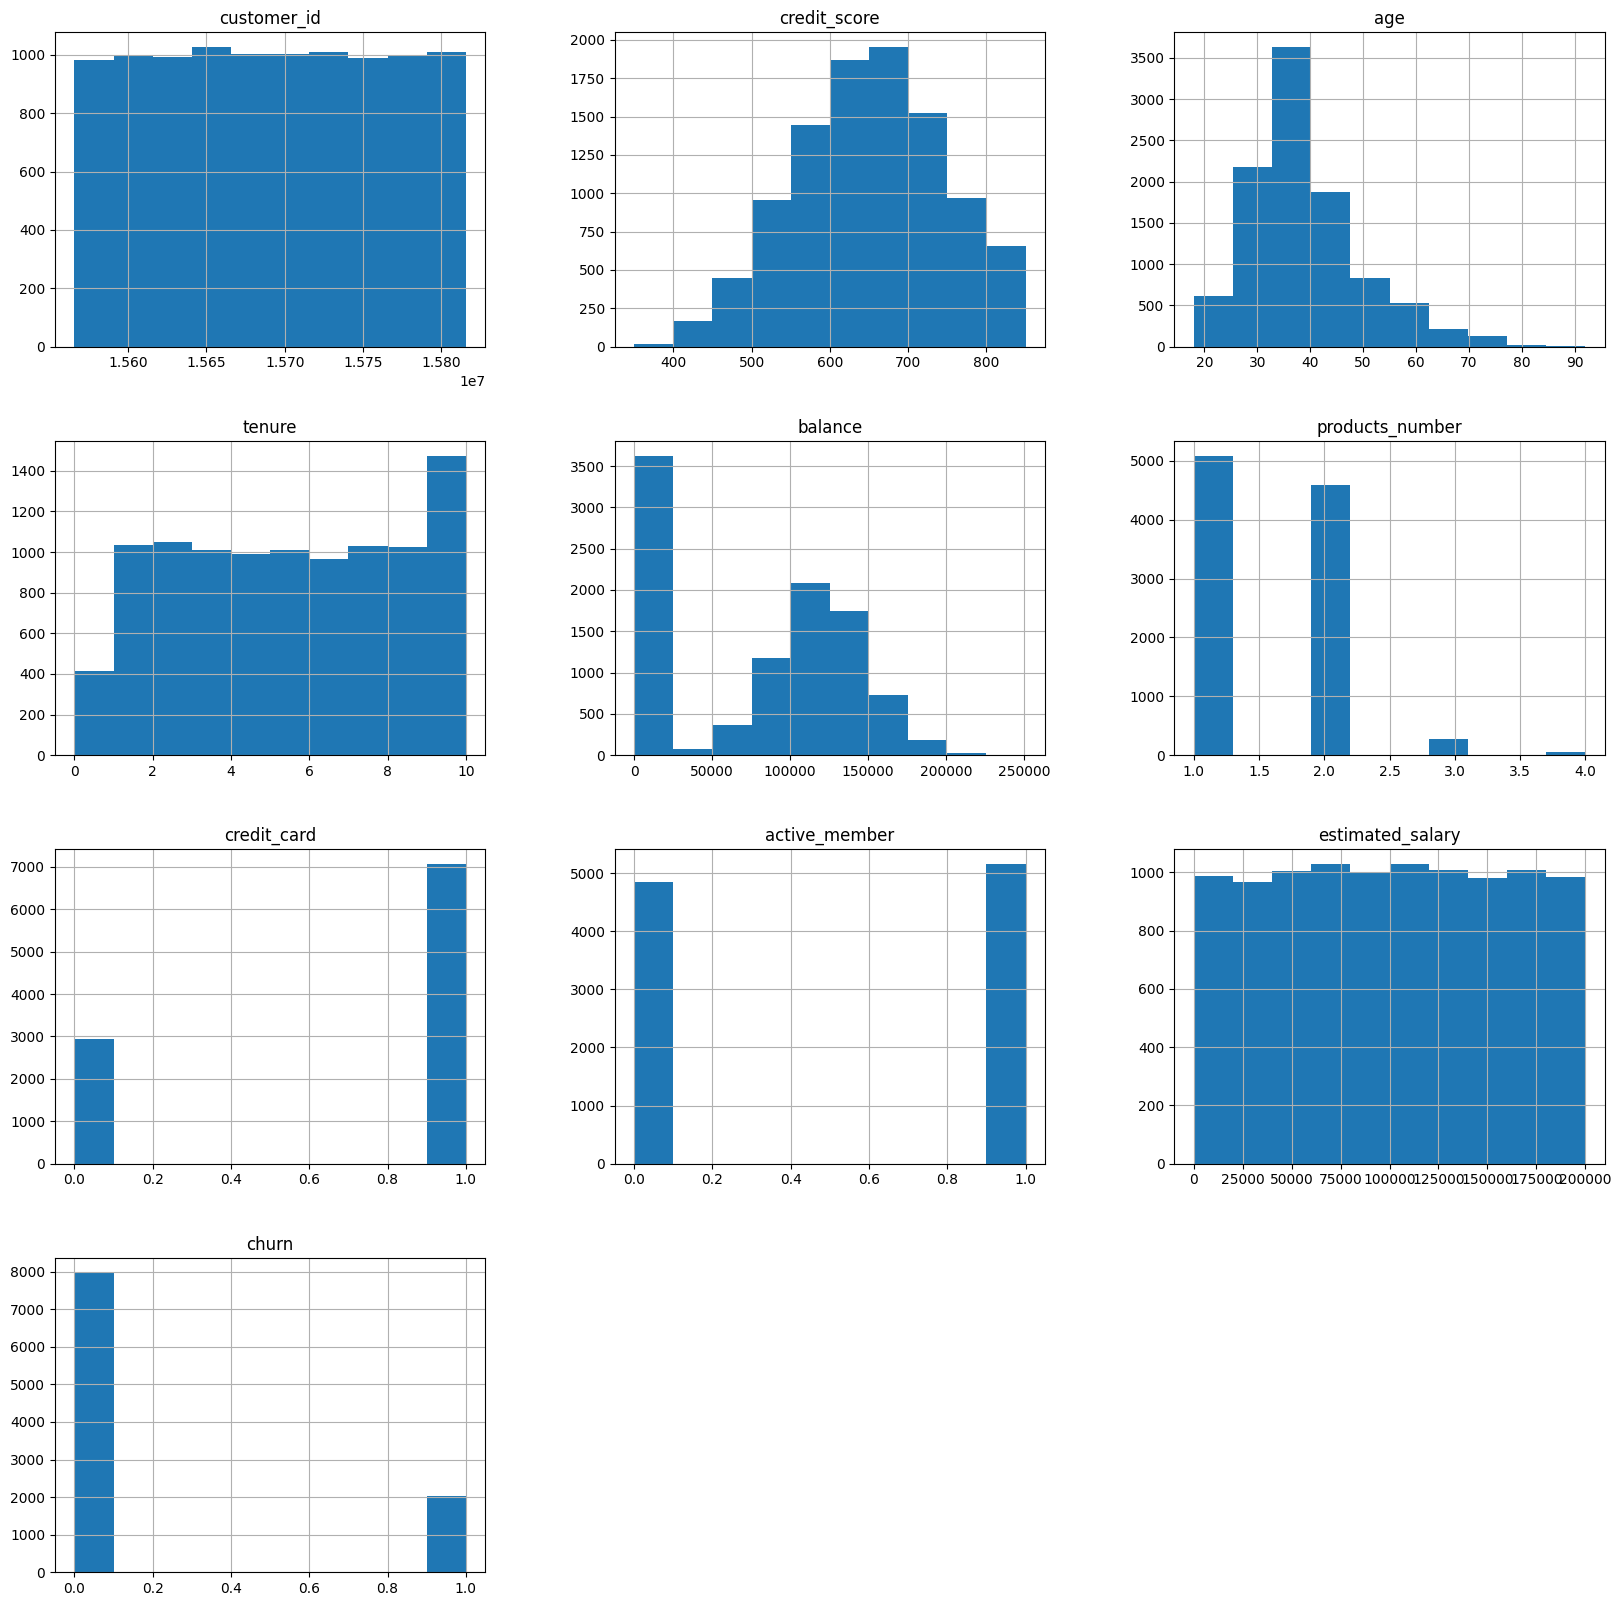

In [11]:
df.hist(figsize=(20, 20))

In [12]:
df.corr()

C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_3900\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<AxesSubplot: >

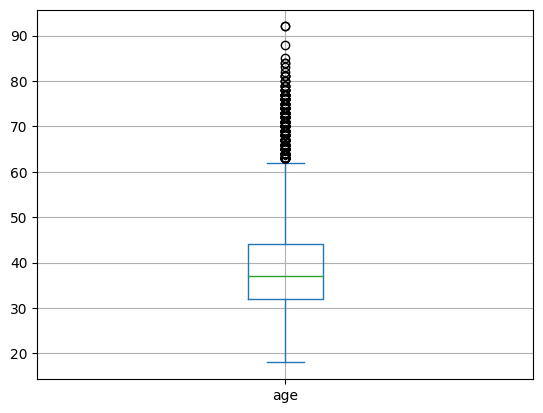

In [13]:
df['age'].plot.box(grid=True)

<AxesSubplot: >

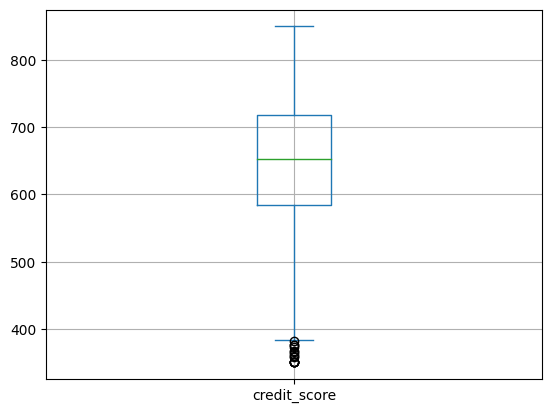

In [14]:
df['credit_score'].plot.box(grid=True)

<AxesSubplot: >

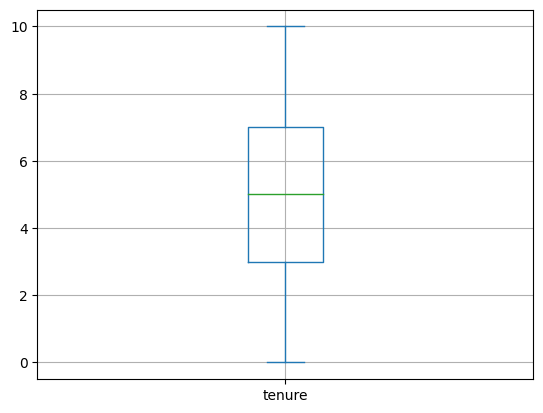

In [15]:
df['tenure'].plot.box(grid=True)

<AxesSubplot: >

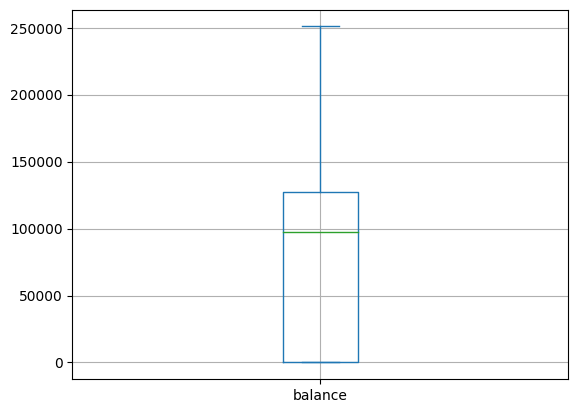

In [16]:
df['balance'].plot.box(grid=True)

In [17]:
phik_matrix(df)

interval columns not set, guessing: ['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.018946,0.000000,0.000000,0.042049,0.000000,0.000000,0.009637,0.000000,0.014253,0.000000,0.029595
credit_score,0.018946,1.000000,0.035375,0.000000,0.000000,0.000000,0.000000,0.034645,0.000000,0.038064,0.034215,0.096525
country,0.000000,0.035375,1.000000,0.013354,0.085025,0.012422,0.463811,0.049418,0.002919,0.010947,0.028372,0.104511
gender,0.000000,0.000000,0.013354,1.000000,0.033815,0.035587,0.000000,0.063174,0.000000,0.031384,0.028019,0.165422
age,0.042049,0.000000,0.085025,0.033815,1.000000,0.036659,0.035357,0.145566,0.016433,0.187434,0.051545,0.487524
tenure,0.000000,0.000000,0.012422,0.035587,0.036659,1.000000,0.052296,0.059077,0.033684,0.024381,0.000000,0.022895
balance,0.000000,0.000000,0.463811,0.000000,0.035357,0.052296,1.000000,0.371385,0.050671,0.018236,0.000000,0.183365
products_number,0.009637,0.034645,0.049418,0.063174,0.145566,0.059077,0.371385,1.000000,0.000000,0.056918,0.031562,0.565084
credit_card,0.000000,0.000000,0.002919,0.000000,0.016433,0.033684,0.050671,0.000000,1.000000,0.009377,0.000000,0.000000
active_member,0.014253,0.038064,0.010947,0.031384,0.187434,0.024381,0.018236,0.056918,0.009377,1.000000,0.032847,0.241939


<AxesSubplot: xlabel='country', ylabel='estimated_salary'>

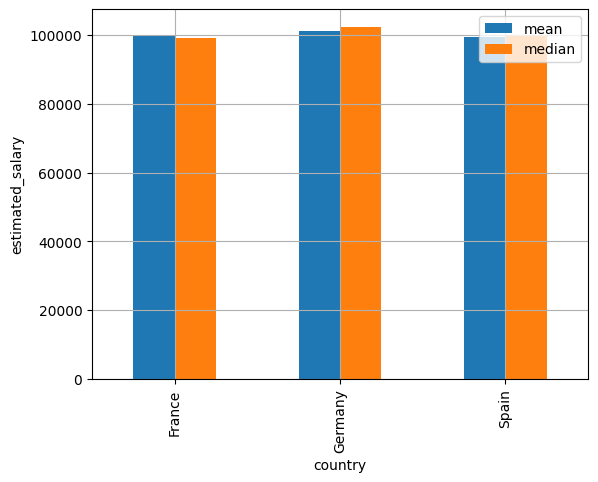

In [18]:
df.groupby('country')['estimated_salary'].agg(['mean', 'median']).plot.bar(ylabel='estimated_salary', grid = True)

<AxesSubplot: title={'center': 'estimated_salary'}, xlabel='country'>

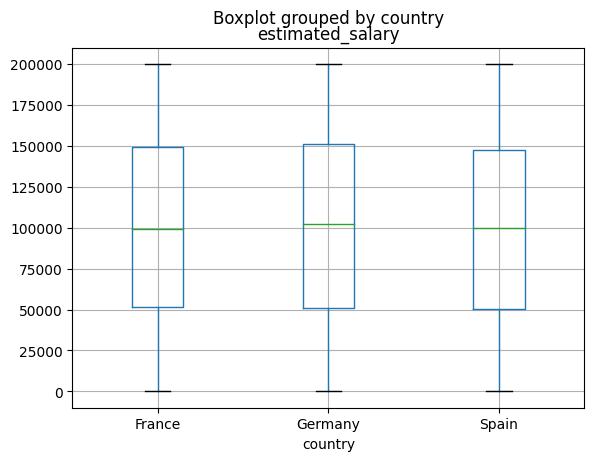

In [19]:
df.boxplot(column='estimated_salary', by='country', grid=True)

    


Text(0.5, 1.0, 'Credit Score')

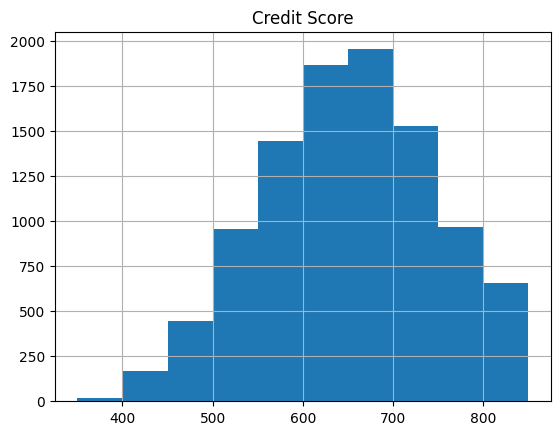

In [20]:
df['credit_score'].hist().set_title("Credit Score")

Text(0.5, 1.0, 'Tenure')

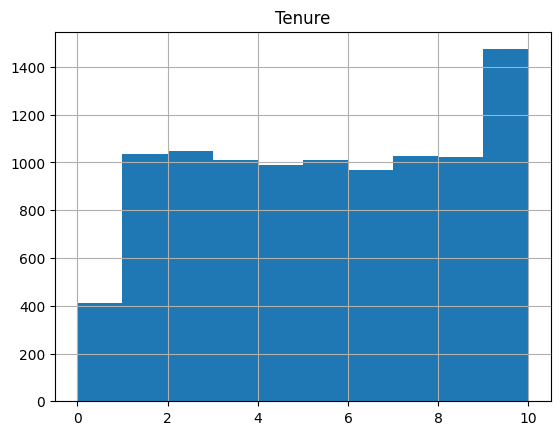

In [21]:
df['tenure'].hist().set_title("Tenure")

Text(0.5, 1.0, 'Balance')

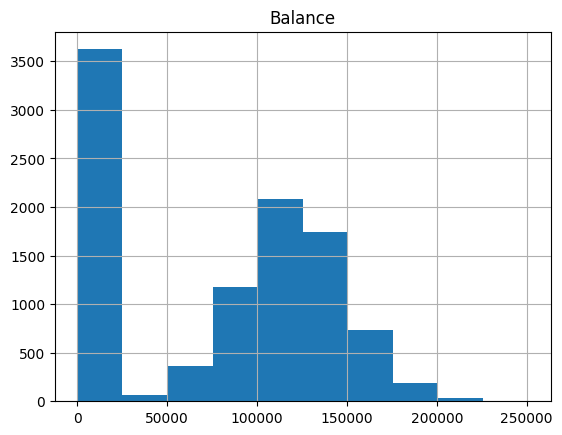

In [22]:
df['balance'].hist().set_title("Balance")

<AxesSubplot: title={'center': 'balance'}, xlabel='group_age'>

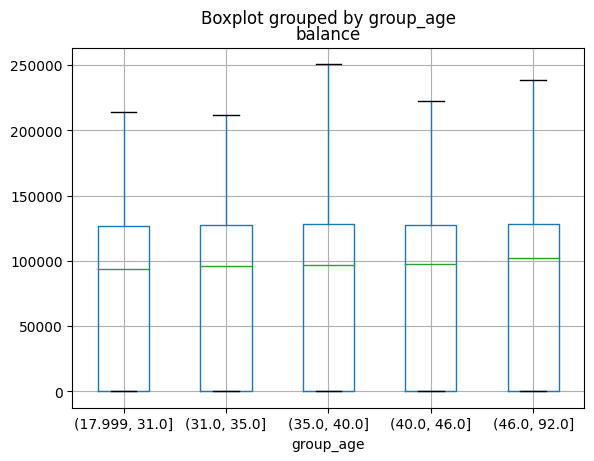

In [23]:
t = df.copy()
t['group_age'] = pd.qcut(t['age'], 5)
t.boxplot(column='balance', by='group_age')

array([[<AxesSubplot: title={'center': '(17.999, 31.0]'}>,
        <AxesSubplot: title={'center': '(31.0, 35.0]'}>],
       [<AxesSubplot: title={'center': '(35.0, 40.0]'}>,
        <AxesSubplot: title={'center': '(40.0, 46.0]'}>],
       [<AxesSubplot: title={'center': '(46.0, 92.0]'}>, <AxesSubplot: >]],
      dtype=object)

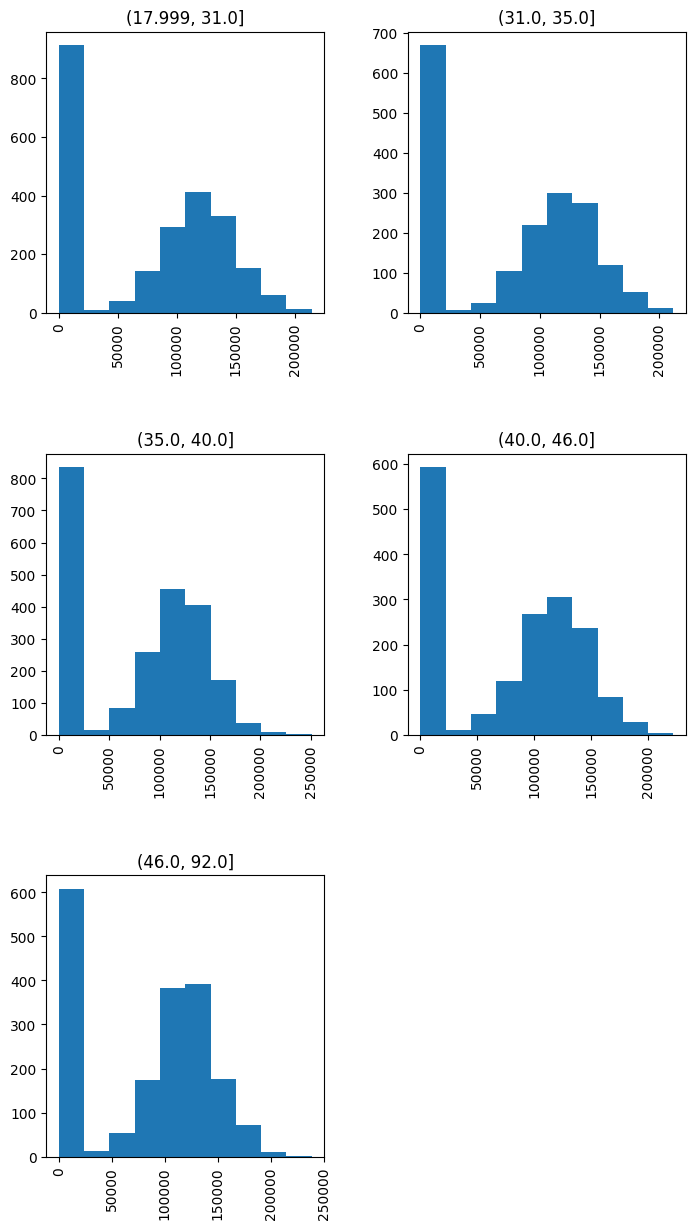

In [24]:
t.hist(column='balance', by='group_age', figsize=(8, 15))

Text(0.5, 1.0, 'products_number')

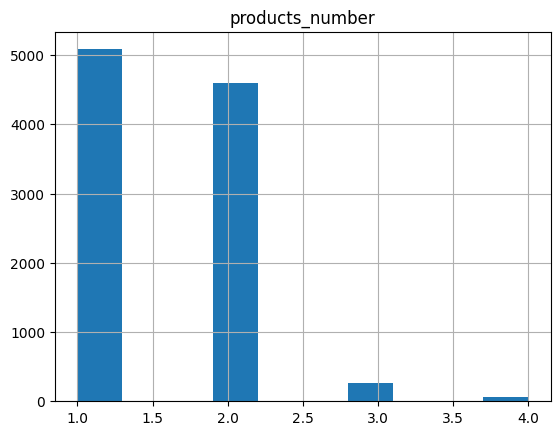

In [25]:
df['products_number'].hist().set_title("products_number")

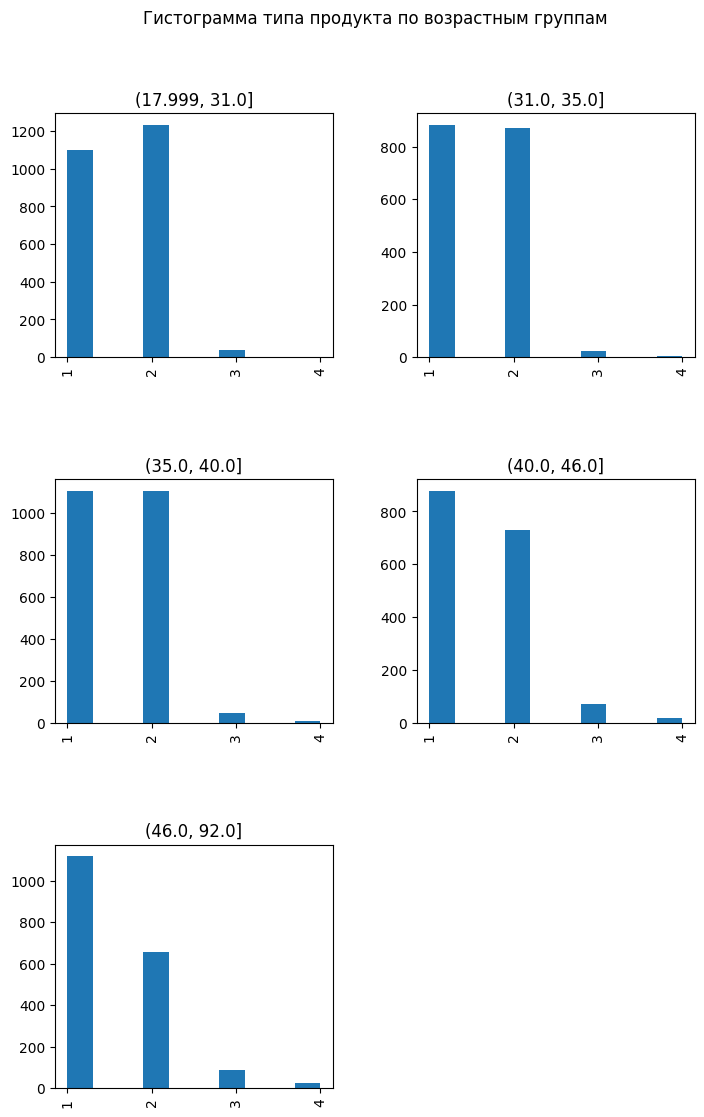

In [26]:
t.hist(column='products_number', by='group_age', figsize=(8, 13))

# Настройка внешнего вида графика и добавление названия
plt.suptitle('Гистограмма типа продукта по возрастным группам')

# Показываем график
plt.show()

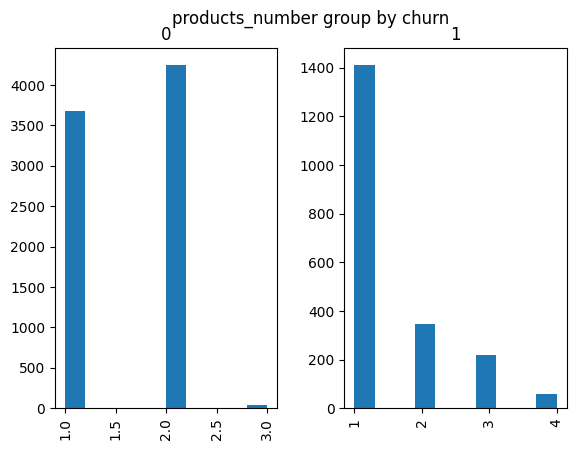

In [27]:
t.hist(column='products_number', by='churn')

# Настройка внешнего вида графика и добавление названия
plt.suptitle('products_number group by churn')

# Показываем график
plt.show()

<AxesSubplot: xlabel='credit_card', ylabel='count'>

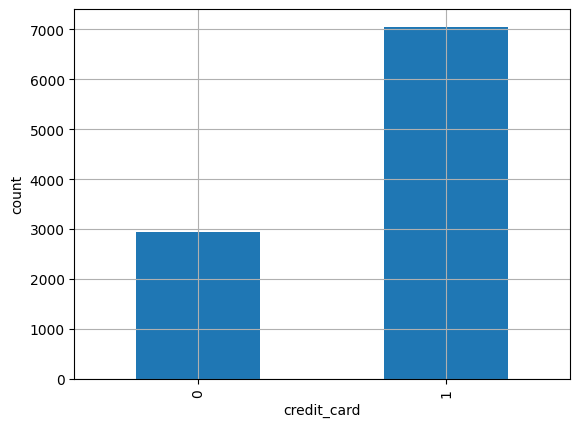

In [28]:
df.groupby('credit_card')['credit_card'].count().plot.bar(grid=True, ylabel='count')

array([[<AxesSubplot: title={'center': '(17.999, 31.0]'}>,
        <AxesSubplot: title={'center': '(31.0, 35.0]'}>],
       [<AxesSubplot: title={'center': '(35.0, 40.0]'}>,
        <AxesSubplot: title={'center': '(40.0, 46.0]'}>],
       [<AxesSubplot: title={'center': '(46.0, 92.0]'}>, <AxesSubplot: >]],
      dtype=object)

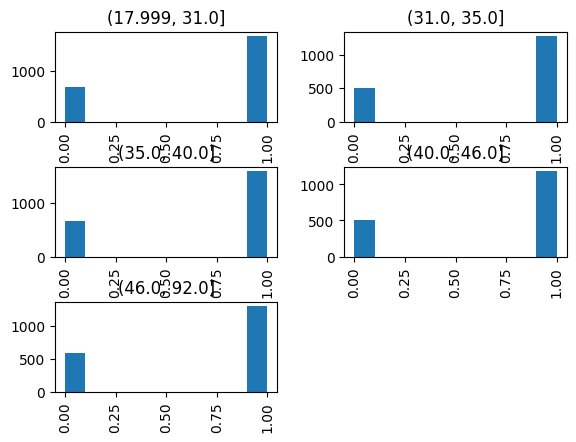

In [29]:
t.hist(column='credit_card', by='group_age')

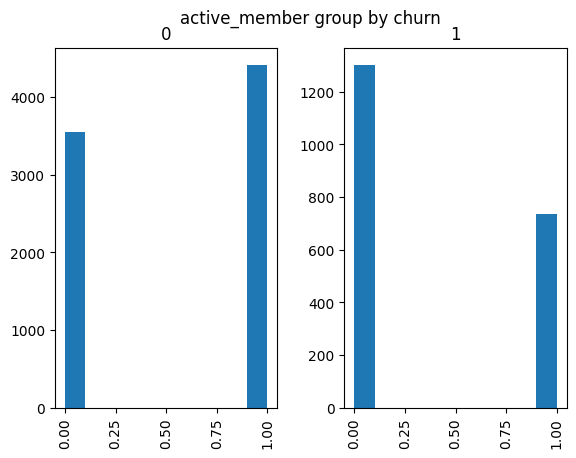

In [30]:
t.hist(column='active_member', by='churn')
# Настройка внешнего вида графика и добавление названия
plt.suptitle('active_member group by churn')

# Показываем график
plt.show()

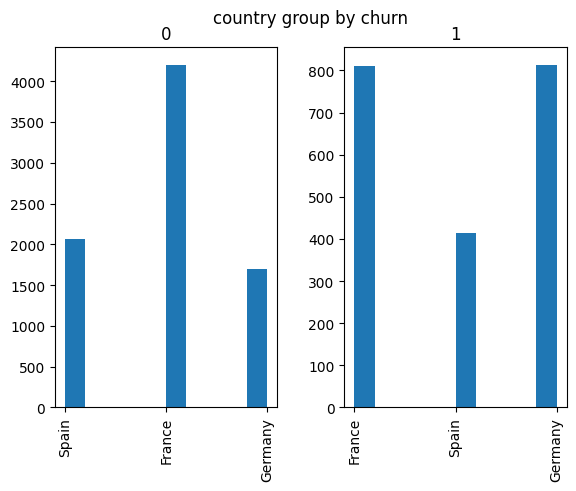

In [31]:
t.hist(column='country', by='churn')
# Настройка внешнего вида графика и добавление названия
plt.suptitle('country group by churn')

# Показываем график
plt.show()

<AxesSubplot: >

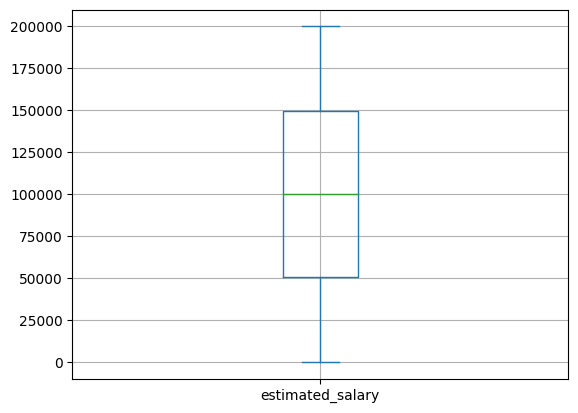

In [32]:
df['estimated_salary'].plot.box(grid=True)

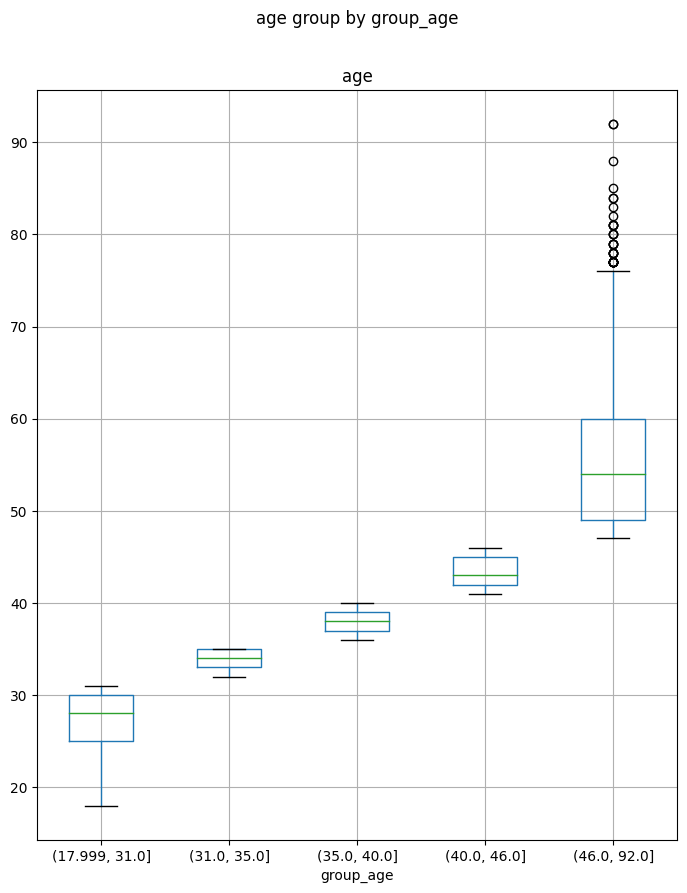

In [33]:
t.boxplot(column='age', by='group_age', figsize=(8, 10))

plt.suptitle('age group by group_age')

# Показываем график
plt.show()

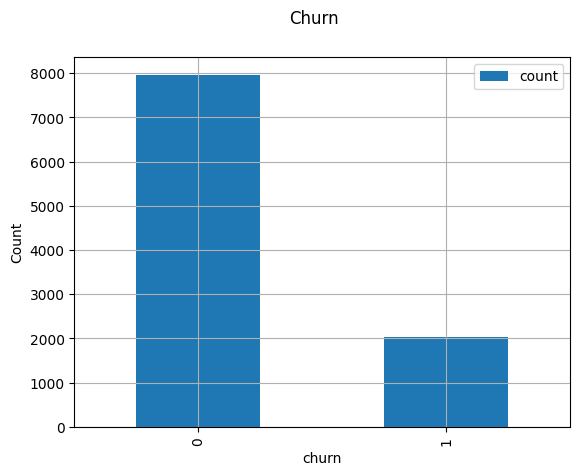

In [34]:
df.groupby('churn')['churn'].agg(['count']).plot.bar(grid=True, ylabel='Count')
plt.suptitle('Churn')

# Показываем график
plt.show()

In [35]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [36]:
df_processed = pd.get_dummies(df, columns=['country', 'gender'], drop_first=True)
df_processed = df_processed.drop(columns='customer_id')
df_processed

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [37]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

names = df_processed.columns
d = scaler.fit_transform(df_processed)

df_processed = pd.DataFrame(d, columns=names)
df_processed.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.0,0.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.0,0.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.0,0.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,1.0,0.0


In [38]:
# Разделите датафрейм на тренировочный и остаточный набор данных
train_df, temp_df = train_test_split(df_processed, test_size=0.3, random_state=42)

train_X = train_df.drop(columns='churn')
train_y = train_df['churn']

# Разделите остаточный набор данных на валидационный и тестовый наборы данных
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

val_X = val_df.drop(columns='churn')
val_y = val_df['churn']

test_X = test_df.drop(columns='churn')
test_y = test_df['churn']

# Выведите размеры полученных наборов данных
print("Размер тренировочного набора данных:", train_df.shape)
print("Размер валидационного набора данных:", val_df.shape)
print("Размер тестового набора данных:", test_df.shape)

Размер тренировочного набора данных: (7000, 12)
Размер валидационного набора данных: (1500, 12)
Размер тестового набора данных: (1500, 12)


In [39]:
train_X.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
9069,0.538,0.189189,0.4,0.699113,0.333333,1.0,1.0,0.863987,0.0,1.0,0.0
2603,0.586,0.216216,0.7,0.639407,0.000000,0.0,1.0,0.942698,1.0,0.0,0.0
7738,0.422,0.202703,0.6,0.000000,0.333333,0.0,0.0,0.868427,0.0,0.0,1.0
1579,0.536,0.310811,0.8,0.150271,0.000000,1.0,1.0,0.978913,1.0,0.0,1.0
5058,0.728,0.256757,0.9,0.591742,0.333333,0.0,1.0,0.756419,0.0,0.0,1.0


In [40]:
k = 1
model = KNeighborsClassifier(n_neighbors=k)
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

print(f'Accuracy {accuracy_score(test_y, pred_y)}')
print(f'F1 {f1_score(test_y, pred_y)}')
print(f'Precision {precision_score(test_y, pred_y)}')
print(f'Recall {recall_score(test_y, pred_y)}')

Accuracy 0.796
F1 0.4778156996587031
Precision 0.48951048951048953
Recall 0.4666666666666667


In [41]:
k = 1
model = KNeighborsClassifier(n_neighbors=k)
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

print(f'Accuracy {accuracy_score(test_y, pred_y)}')
print(f'F1 {f1_score(test_y, pred_y)}')
print(f'Precision {precision_score(test_y, pred_y)}')
print(f'Recall {recall_score(test_y, pred_y)}')

Accuracy 0.796
F1 0.4778156996587031
Precision 0.48951048951048953
Recall 0.4666666666666667


In [42]:
smote = SMOTE()
train_X_sm, train_y_sm = smote.fit_resample(train_X, train_y)

In [43]:
k = 6
model = KNeighborsClassifier(n_neighbors=k)
model.fit(train_X_sm, train_y_sm)
pred_y = model.predict(test_X)

print(f'Accuracy {accuracy_score(test_y, pred_y)}')
print(f'F1 {f1_score(test_y, pred_y)}')
print(f'Precision {precision_score(test_y, pred_y)}')
print(f'Recall {recall_score(test_y, pred_y)}')

Accuracy 0.7593333333333333
F1 0.4908321579689704
Precision 0.4254278728606357
Recall 0.58


In [44]:
model = KNN(countNeigbor=1, metric='cosine')
model.fit(train_X_sm, train_y_sm)
pred_y = model.predict(test_X)

print(f'Accuracy {accuracy_score(test_y, pred_y)}')
print(f'F1 {f1_score(test_y, pred_y)}')
print(f'Precision {precision_score(test_y, pred_y)}')
print(f'Recall {recall_score(test_y, pred_y)}')

Accuracy 0.762
F1 0.46636771300448426
Precision 0.42276422764227645
Recall 0.52


In [45]:
model = ParzenWindowVariableWidth(countNeighbor=1)
model.fit(train_X_sm, train_y_sm)
pred_y = model.predict(test_X)

print(f'Accuracy {accuracy_score(test_y, pred_y)}')
print(f'F1 {f1_score(test_y, pred_y)}')
print(f'Precision {precision_score(test_y, pred_y)}')
print(f'Recall {recall_score(test_y, pred_y)}')

Accuracy 0.7646666666666667
F1 0.48316251830161056
Precision 0.4308093994778068
Recall 0.55


In [46]:
model = ParzenWindowFixedWidth(width=0.4)
model.fit(train_X_sm, train_y_sm)
pred_y = model.predict(test_X)

print(f'Accuracy {accuracy_score(test_y, pred_y)}')
print(f'F1 {f1_score(test_y, pred_y)}')
print(f'Precision {precision_score(test_y, pred_y)}')
print(f'Recall {recall_score(test_y, pred_y)}')

Accuracy 0.7166666666666667
F1 0.4667503136762861
Precision 0.37424547283702214
Recall 0.62


In [49]:
matrix = np.random.random((10000, 12))
from scipy.spatial.distance import cdist
dist_matrix = cdist(matrix, matrix, metric='cosine')
dist_matrix


array([[0.00000000e+00, 1.65771193e-01, 2.76011742e-01, ...,
        2.45812983e-01, 2.30317870e-01, 2.87217300e-01],
       [1.65771193e-01, 0.00000000e+00, 3.77211589e-01, ...,
        1.29017181e-01, 1.63619194e-01, 9.33242595e-02],
       [2.76011742e-01, 3.77211589e-01, 1.11022302e-16, ...,
        4.08969584e-01, 3.05815590e-01, 3.50111366e-01],
       ...,
       [2.45812983e-01, 1.29017181e-01, 4.08969584e-01, ...,
        0.00000000e+00, 1.58228904e-01, 1.09347103e-01],
       [2.30317870e-01, 1.63619194e-01, 3.05815590e-01, ...,
        1.58228904e-01, 2.22044605e-16, 1.86369609e-01],
       [2.87217300e-01, 9.33242595e-02, 3.50111366e-01, ...,
        1.09347103e-01, 1.86369609e-01, 0.00000000e+00]])